# 4.

## a.

\begin{equation*}
F(x) = 1
\end{equation*}

\begin{equation*}
F(x) = \int_{0}^{1}ce^x dx + \int_{1}^{\infty}ce^{2-x} dx = ce^x \Big |_{0}^{1} + \Big (-ce^{2-x} \Big |_{1}^{\infty} \Big ) = c(e -1) + ce = c(2e -1)
\end{equation*}

\begin{equation*}
c(2e - 1) = 1
\end{equation*}

\begin{equation*}
c = \frac{1}{2e - 1}
\end{equation*}

## b.

The cdf of X can be computed as follows:

For $0\leq x \leq 1$:
\begin{align}
F(x) & = \int_{0}^{x}ce^t dt = ce^t \Big |_{0}^{x} = c(e^x - 1) = \frac{e^x-1}{2e-1}
\end{align}

For $x > 1$:
\begin{equation*}
F(x) = \int_{0}^{1}ce^t dt + \int_{1}^{x}ce^{2-t} dt = ce^t \Big |_{0}^{1} + \Big (-ce^{2-t} \Big |_{1}^{x} \Big ) = c(e - 1) + c \Big (e - e^{2-x} \Big ) = \frac{-e^{2-x}+e^2+e-1}{2e-1}
\end{equation*}


\begin{equation*}
F(x)=
\begin{cases}
    0                            &  x < 0\\
    \frac{e^x-1}{2e-1}          & 0\leq x \leq 1\\
    \frac{-e^{2x}+2e-1}{2e-1}   & x > 1\\
\end{cases}
\end{equation*}

Compute the inverse of the cdf as follows:
\begin{equation*}
u = \frac{e^x-1}{2e-1} \Longrightarrow x = log(1 - u + 2eu)
\end{equation*}

\begin{equation*}
u = \frac{-e^{2-x}+e^2+e-1}{2e-1} \Longrightarrow x = log\Big (\frac{e^2}{-2eu+u+e^2+e-1} \Big )
\end{equation*}

Breakpoint x = 1, u = $\frac{e-1}{2e-1}$
\begin{equation*}
F^{-1}(u)=
\begin{cases}
    log(1 - u + 2eu)          & 0\leq x \leq \frac{e-1}{2e-1}\\
    log\Big (\frac{e^2}{-2eu+u+e^2+e-1} \Big )   & \frac{e-1}{2e-1} < x \leq 1\\
\end{cases}
\end{equation*}

The inversion algorithm is:
1. Generate U ∼ U[0, 1].
2. If U ≤ $\frac{e-1}{2e-1}$, return X = $log(1 - u + 2eu)$. If U ≥ $\frac{e-1}{2e-1}$, return X = $log\Big (\frac{e^2}{-2eu+u+e^2+e-1} \Big )$.

## c.

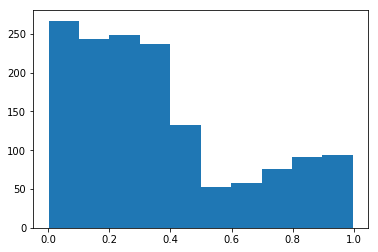

In [31]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

e=math.exp(1);

n = 1500
U = np.random.rand(n)
X = np.empty(n)
for i in range(n):
    # Inversion method
    if U[i] <= (e-1)/(2*e-1):
        X[i] = math.log(1-U[i]+2*e*U[i])
    else:
        X[i] = math.log((e**2)/(-2*e*U[i]+U[i]+e**2+e-1))

plt.hist(X); # Plot histogram

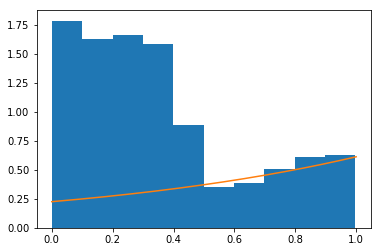

In [32]:
plt.hist(X, normed=1); # plot histogram with "relative" frequencies

x = np.linspace(0,1,1000)
fx = np.empty(1000)
c = 1/(2*e-1)
for i in range(1000):
    if x[i] <= 1:
        fx[i] = c*e**x[i]
    else:
        fx[i] = c*e**(2-x[i])
plt.plot(x,fx); # plot pdf of X